# Statistical Learning Project-2

Importing all the necessary libraries

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns


Reading the csv file

In [131]:
ins_df=pd.read_csv(r"C:\Users\user\Documents\Python Scripts\Project_2\insurance.csv")

Shape of the dataframe suggesting number of rows and columns; here we have *7 columns and 1338 records*

In [132]:
ins_df.shape

(1338, 7)

Datatype of our columns: smoker, region and sex are categorical data.

In [133]:
ins_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Checking the presence of missing values

In [134]:
df = ins_df[ins_df.isna().any(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges


**No missing values in our dataset as the df above displays no values**

## 5 point summary of numerical attributes:

In [135]:
ins_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

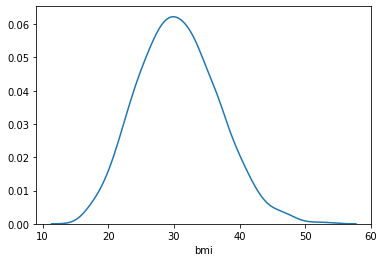

In [136]:
sns.distplot(ins_df['bmi'],hist=False)

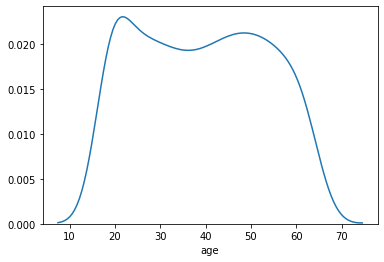

In [137]:
sns.distplot(ins_df['age'],hist=False)

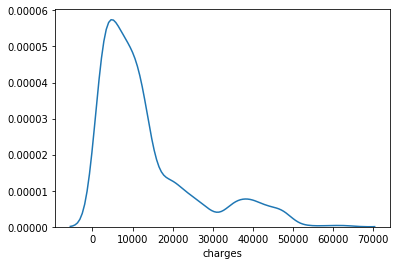

In [138]:
sns.distplot(ins_df['charges'],hist=False)

## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns


In [139]:
ins_df[['bmi','age','charges']].skew(axis = 0,)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

**All have a positive skew ie. they have long right tail as also evident in the KDEs above. 'Charges' columns has highly right skewed data points**

## Checking the presence of outliers in 'bmi', 'age' and 'charges' columns


**Using boxplots to detect outliers.**
- 'charges' is heavily right skewed. 
- The column bmi has some data points which are outliers on the right. 
- 'Age' is a multimodal distribution, it has no outliers.  

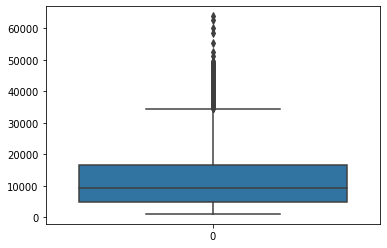

In [140]:
sns.boxplot(data=ins_df['charges'])

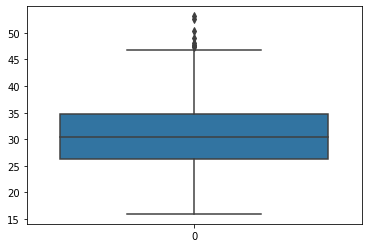

In [141]:
sns.boxplot(data=ins_df['bmi'])

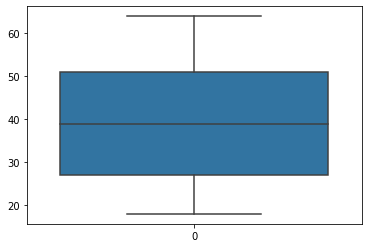

In [142]:
sns.boxplot(data=ins_df['age'])

## Distribution of categorical columns (include children)

In [143]:
ins_df['children']=ins_df.children.astype('category')

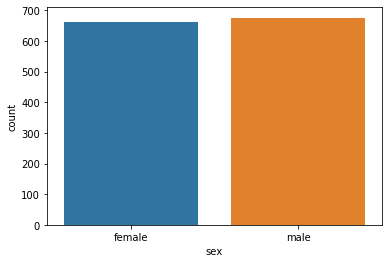

In [144]:

sns.countplot(x='sex',data=ins_df)


The above graph shows counts of male and female subjects, **the dataset has almost equal number of subjects for both genders**

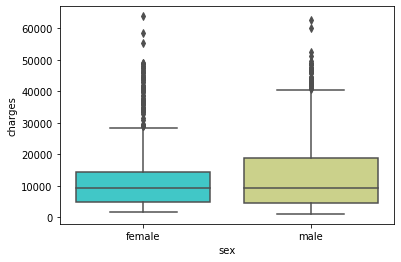

In [145]:
sns.boxplot(x='sex',y='charges',data=ins_df,palette='rainbow')

The above graph shows the distribution for male and female against the charges. This helps us realise the charges for each gender categoy. 

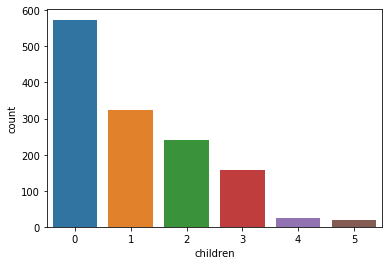

In [146]:
sns.countplot(x='children',data=ins_df)

**This dataset has more number of people with no cover for children**

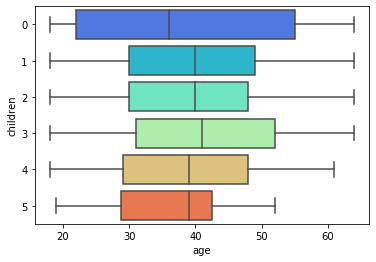

In [147]:
sns.boxplot(x='age',y='children',data=ins_df,palette='rainbow')

This graph highlights the age groups againts the cover for children

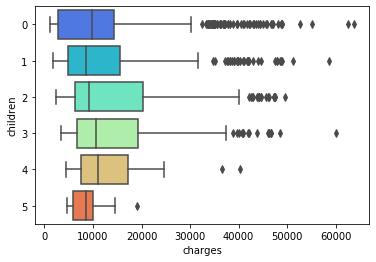

In [148]:
sns.boxplot(x='charges',y='children',data=ins_df,palette='rainbow')

Since our data has more data points with people choosing insurance with no cover for children, the representation maybe misleading

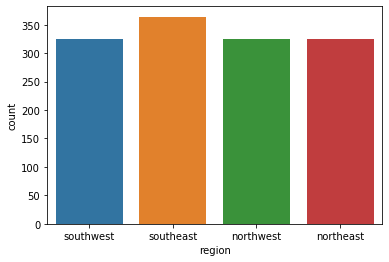

In [149]:
sns.countplot(x='region',data=ins_df)

A count plot for regions shows a fairly symmetrical datapoints representing all regions

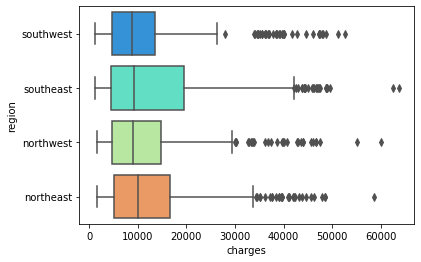

In [150]:
sns.boxplot(x='charges',y='region',data=ins_df,palette='rainbow')

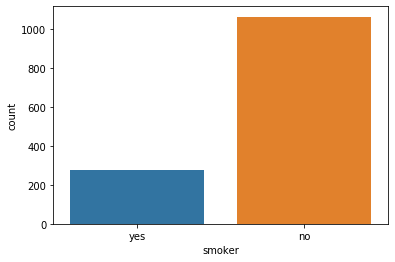

In [151]:
#Smoker
sns.countplot(x='smoker',data=ins_df)

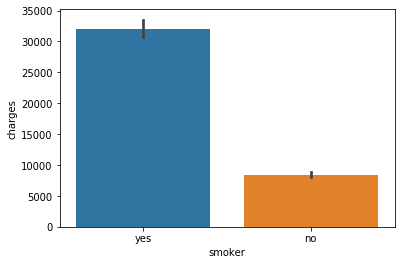

In [152]:
sns.barplot(x='smoker',y='charges',data=ins_df)

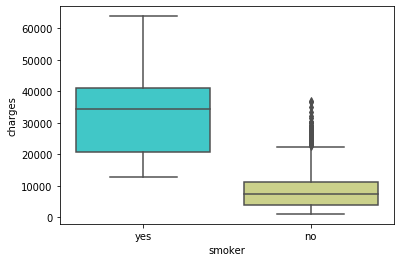

In [153]:
sns.boxplot(x='smoker',y='charges',data=ins_df,palette='rainbow')

## Pair plot that includes all the columns of the dataframe


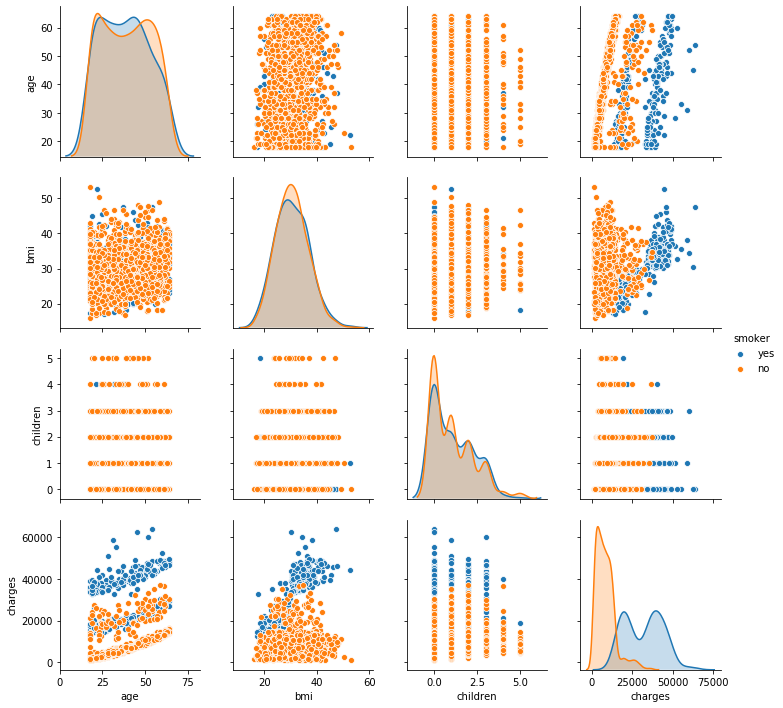

In [154]:
sns.pairplot(ins_df,hue='smoker')

# Answer the following questions with statistical evidence

## a. Do charges of people who smoke differ significantly from the people who don't?

**NOTE As I was reading upon this topic of independednt sample t test, it says there should be no outliers or heavy one sided tails,
but it is observed that for charges there are many outliers, and there are very less data points for people who don't smoke, so I guess we will not get a very accurate p value and the dataset is not good to perform the said hypothesis, but I am going forward and doing the test**

For this analysis to check if the mean of the charges for two sample(smoker =yes/no), we will use indpendent sample t-test
my null and alternate hypothesis will be as follows

Null Hypothesis H0: Charges are same for smokers and non smokers


Alternate Hypothesis HA: Charges are not same



In [155]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
from scipy.stats import t
import scipy.stats as stats
from statsmodels.stats import weightstats as statsmodelsweightstats

aplha=0.05
smoker_charges=ins_df['charges'].loc[ins_df['smoker']=='yes']
nonsmoker_charges=ins_df['charges'].loc[ins_df['smoker']=='no']

In [157]:
smoker_charges_count = len(smoker_charges)
nonsmoker_charges_count = len(nonsmoker_charges)
degrees_of_freedom = smoker_charges_count + nonsmoker_charges_count - 2
degrees_of_freedom

1336

In [158]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(stats.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom), 3)
t_critical

-1.962

since it is a two-tailed test t-critical will be +1.962 and -1.962

In [159]:
#t-test for independent variables 
stats.ttest_ind(a=smoker_charges, b=nonsmoker_charges, equal_var=False)


Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

**since the t-statistic value(32.75) is greater than the critical value(+1.962), we reject the null hypotheis and accept the alternate hypothesis that
charges are significatly different from smokers and non-smokers**

## b. Does bmi of males differ significantly from that of females?


For this analysis to check if the mean of the bmi for two sample(sex =male/female), we will use indpendent sample t-test my null and alternate hypothesis will be as follows

Null Hypothesis H0: mean bmi are same for male and females

Alternate Hypothesis HA: mean bmi is not same for males and females

In [160]:
from scipy.stats import t
import scipy.stats as stats
from statsmodels.stats import weightstats as statsmodelsweightstats

aplha=0.05
bmi_men=ins_df['bmi'].loc[ins_df['sex']=='male']
bmi_female=ins_df['bmi'].loc[ins_df['sex']=='female']

In [161]:
men_count = len(bmi_men)
female = len(bmi_female)
degrees_of_freedom = smoker_charges_count + nonsmoker_charges_count - 2
degrees_of_freedom

1336

In [162]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2

stats.ttest_ind(a=bmi_men, b=bmi_female, equal_var=False)

Ttest_indResult(statistic=1.697027933124022, pvalue=0.08992430667834876)

**As our critical value 1.962 is greater than our T-statistic 1.67, we fail to reject the null hypothesis**

Hence we cannot say that the bmi of males is significanly different then females

## c. Is the proportion of smokers significantly different in different genders?


For analysis of dependecies between these two categorical values, we will use Chi-Square test for independence and deduce the Probability value.

My null ad alternate hypothesis will be as follows

Null Hypothesis:
Ho: Gender and smoking preferences are independent.


Alternate Hypothesis:
HA: Gender and smoking preferences are not independent.



In [163]:
#importing necessary libraries
from scipy.stats import chisquare,chi2_contingency
from scipy.stats import chi2

In [164]:
# Creating contingency table
table = pd.crosstab(ins_df["sex"],
                   ins_df["smoker"])
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('\n\rdof=%d' % dof)
print('\n\rExpected=', expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('\n\rprobability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


smoker   no  yes
sex             
female  547  115
male    517  159

dof=1

Expected= [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]

probability=0.950, critical=3.841, stat=7.393
Dependent (reject H0)
significance=0.050, p=0.007
Dependent (reject H0)



**Since p-value is less than alplha and also the chi statistis is greater that critical value, we reject the null hypothesis and accept the Alternate Hypothesis that Gender and smoking preference are related.**

## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

For analysis between 3(no child, 1 child, 2 children ) sample of bmi for women population, I will use one way ANOVA.

(Here I have directly taken a dataset for women and not for men and women, in that case I would have used Two way anova)

My Hypotheises will be:

Null Hypothesis H0: Distribution of bmi for women with one child, no child, 2 children is same

Alternate Hypothesis HA: Distributiion of bmi for women with one child, no child, 2 children is NOT same



In [165]:
ins_df['children']=ins_df.children.astype('int')
bmi_female_0=ins_df['bmi'].loc[(ins_df['sex']=='female') & (ins_df['children'] == 0)]
bmi_female_1=ins_df['bmi'].loc[(ins_df['sex']=='female') & (ins_df['children'] == 1)]
bmi_female_2=ins_df['bmi'].loc[(ins_df['sex']=='female') & (ins_df['children'] == 2)]
bmi_female_0.describe()

count    289.000000
mean      30.361522
std        5.966934
min       17.290000
25%       26.200000
50%       29.925000
75%       34.600000
max       47.410000
Name: bmi, dtype: float64

In [166]:
alpha=0.05
stats.f_oneway(bmi_female_0, 
             bmi_female_1,
             bmi_female_2)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

**Since p value(0.7) is greater than alpha 0.05,which is indicating that there is an overall significant effect of number of children on bmi, hence we reject the null hypotheisis**

---------------------fin---------------------------